#**Analisi dei flussi degli utenti Vodafone**

Lo studio dei flussi di persone all'interno delle aree urbane è di fondamentale importanza per comprendere al meglio le criticità emergenti nella mobilità locale e per esplorare le aree di potenziale miglioramento delle infrastrutture e dei trasporti locali.<br>
La mobilità degli utenti all'interno e verso Padova è stata monitorata utilizzando i dati forniti dal gestore di telefonia mobile Vodafone, che fornisce informazioni basate sulle connessioni degli utenti alle celle della rete.<br>
I dati forniti dal carrier comprendono il monitoraggio degli utenti connessi alla rete Vodafone di Padova in un periodo di quattro mesi, da febbraio a maggio 2018.<br>
Per fornire approfondimenti statistici sul numero e sul flusso di utenti, i dati sono stati aggregati in base all'origine e ai movimenti degli utenti, calcolando la media del numero di connessioni durante il periodo di monitoraggio.<br>
Per evitare ulteriori problemi di violazione della privacy, tutte le osservazioni con meno di 30 unità (ad esempio le aree giornaliere per le quali <30 utenti hanno contribuito) sono state scartate e/o accorpate in categorie dedicate (indicate con "altro").<br>

## **Set di dati** 

I dataset si trovano al seguente link: https://www.dropbox.com/scl/fo/jra3xy77imdqc6hjc8luu/h?dl=0&rlkey=3ui6k9bhie88zxsk70zs317ow . La cartella comprende parecchi dati, si invita ad anallizzarli adeguatamente alle esigenze del problema ed eventualmente scartare dati inutili ai fini del progetto. I dati sono in diversi formati ed alcuni di questi sono descritti di seguito.

* __day_od.csv__: tabella delle origini e delle destinazioni degli utenti mediate per giorno della settimana. I dati sono forniti con il dettaglio del mese, del tipo di utente (residente a Padova/visitatore italiano/visitatore straniero), del Paese di provenienza, insieme alla provincia e al comune dell'utente (se disponibili).
* __utenti_distinti_giorno.csv__: tabella del numero di utenti distinti per provenienza. I dati sono forniti con il dettaglio del mese, del tipo di utente (residente a Padova/visitatore italiano/visitatore straniero), del Paese di provenienza, insieme alla provincia e al comune dell'utente (se disponibili).

Le informazioni sono memorizzate nei campi secondo il seguente schema: 

- MONTH: mese analizzato
- DOW: giorno analizzato
- ORIGIN: area di provenienza dell'utente
- DESTINATION: area di destinazione dell'utente
- CUST_CLASS: tipo di utente (residente / visitatore italiano / visitatore straniero)
- COD_COUNTRY: codice paese dell'utente (es. 222=Italia)
- COD_PRO: codice della provincia dell'utente (ad es. 12=Varese) 
- PRO_COM: codice del comune dell'utente (es. 12026=Busto Arsizio)
- FLOW: numero di movimenti per una determinata data-ora (con un minimo di 30 utenti)
- VISITORS: numero complessivo di utenti 

Insieme ai file di dati, vengono fornite tre tabelle di ricerca che permettono di abbinare i codici ISTAT di paese, provincia e comune ai nomi reali.

* __codici_istat_comune.csv__: file di lookup contenente la mappatura dei codici ISTAT dei comuni
* __codici_istat_provincia.csv__: file di ricerca contenente la mappatura dei codici ISTAT della provincia
* __codici_nazioni.csv__: file di lookup contenente la mappatura del codice _paese_ con il suo nome

Ulteriori informazioni, utili per lo studio dei flussi di utenti, come il numero di abitanti di ogni provincia e la distanza tra Padova e tutte le altre province italiane, possono essere estratte sulla base dei dati raccolti dall'ISTAT (es. http://dati.istat.it/Index.aspx?lang=en&SubSessionId=bcd553a8-280a-4b08-afee-cf7a72fd2ad9, http://www.istat.it/storage/cartografia/matrici_distanze/Veneto.zip).


## Assegnazione

1. Preparazione dei dati: i file csv provengono da fonti diverse e quindi presentano differenze di codifica e di fine riga che devono essere prese in considerazione nella fase di preparazione dei dati. Assicurarsi che ogni file .csv sia interpretato correttamente.
* Classifica dei visitatori provenienti da paesi stranieri: in base al numero di visitatori totali per ogni paese, creare una classifica dei primi 20 paesi con il maggior numero di visitatori.
* Classifica dei visitatori italiani per provincia, ponderata per il numero di abitanti: in base al numero di visitatori totali per provincia italiana, creare una classifica delle prime 20 province con più visitatori tenendo conto del numero di abitanti.
* Studio dei flussi di visitatori: ipotizziamo di essere chiamati a fornire indicazioni su come investire risorse per migliorare la mobilità verso Padova. Definite le tre principali direzioni dei visitatori  che raggiungono Padova attraverso le autostrade italiane (sud: A13 verso Bologna-Roma / ovest: A4 verso Milano-Torino / nord-est: A4 verso Venezia-Trieste), valutare quale delle tre direzioni deve essere privilegiata:
 1. Considerare un caso semplificato che coinvolge solo la mobilità di fascia media, in base al numero di visitatori provenienti solo dalle regioni vicine
 2. Considerare le province situate sulle tre direzioni che contribuiscono maggiormente al flusso di visitatori del fine settimana , effettuando uno studio più dettagliato dei flussi in base al giorno della settimana.
 3. Utilizzate i dati disponibili per fornire quella che ritenete la migliore risposta possibile. 
* Tracciare la distribuzione del numero di visitatori in base alla distanza della provincia di origine. Determinare il tipo di legge da utilizzare per descrivere la distribuzione.
 * Supponendo che si possa usare una forma analitica per descrivere l'andamento, create una regressione per stimare il numero atteso di visitatori in base alla distanza della provincia di origine. Illustrare la differenza tra la regressione ottenuta e i numeri forniti dal monitoraggio Vodafone, evidenziando le cinque discrepanze più evidenti rispetto alle aspettative.
* Utilizzate tutti i dati disponibili (ed eventualmente quelli aggiuntivi di fonte ISTAT) per estrarre un'altra informazione interessante sulla mobilità e sul flusso di visitatori.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA

In [2]:
df_comune = pd.read_csv("codici_istat_comune.csv", encoding="latin1")


In [3]:
df_comune

,COD_PRO,PRO_COM,COMUNE,COMUNE_CAPOLUOGO
0,1,1001,Agliè,0
1,1,1002,Airasca,0
2,1,1003,Ala di Stura,0
3,1,1004,Albiano d'Ivrea,0
4,1,1005,Alice Superiore,0
...,...,...,...,...
7950,111,111104,Villasalto,0
7951,111,111105,Villasimius,0
7952,111,111106,Villasor,0
7953,111,111107,Villaspeciosa,0


In [4]:
df_province = pd.read_csv("codici_istat_provincia.csv", encoding="latin-1")

In [5]:
df_province

,COD_REG,COD_PRO,PROVINCIA,PROV_SIGLA
0,1,1,Torino,TO
1,1,2,Vercelli,VC
2,1,3,Novara,NO
3,1,4,Cuneo,CN
4,1,5,Asti,AT
...,...,...,...,...
103,20,91,Nuoro,NU
104,20,92,Cagliari,CA
105,20,95,Oristano,OR
106,20,111,Sud Sardegna,SU


In [6]:
df_nazioni = pd.read_csv("codici_nazioni.csv", encoding="utf-16be").sort_values("COD_COUNTRY", ascending=False)

In [7]:
df_nazioni

,COD_COUNTRY,COUNTRY_NAME_IT
78,995,Territorio britannico dell'Oceano Indiano
112,750,Isole Falkland (UK)
53,748,Uruguay
111,746,Suriname
52,744,Paraguay
...,...,...
0,212,Monaco
171,208,Francia
170,206,Belgio
116,204,Paesi Bassi


In [8]:
df_users = pd.read_csv("distinct_users_day.csv", encoding="latin-1").sort_values("COD_COUNTRY", ascending=False)

In [9]:
df_users

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS
2127,Mercoledì,foreigner,901.0,NaN,NaN,32
5333,Lunedì,foreigner,901.0,NaN,NaN,32
2315,Martedì,foreigner,901.0,NaN,NaN,32
12844,Domenica,foreigner,748.0,NaN,NaN,60
11050,Sabato,foreigner,748.0,NaN,NaN,72
...,...,...,...,...,...,...
5334,Venerdì,foreigner,NaN,NaN,NaN,408
6165,Sabato,foreigner,NaN,NaN,NaN,380
6627,Giovedì,foreigner,NaN,NaN,NaN,396
10023,Lunedì,foreigner,NaN,NaN,NaN,380


In [10]:
df_users.isna().sum()/len(df_users)*100

DOW            0.000000
CUST_CLASS     0.000000
COD_COUNTRY    0.054496
COD_PRO        4.149475
PRO_COM        4.149475
VISITORS       0.000000
dtype: float64

In [11]:
df_users = df_users.dropna(subset=["COD_COUNTRY"])

In [12]:
df_users.COD_COUNTRY  =df_users.COD_COUNTRY.apply(lambda x : int(x))

C:\Users\tommy\AppData\Local\Temp\ipykernel_8352\1744862790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users.COD_COUNTRY  =df_users.COD_COUNTRY.apply(lambda x : int(x))


In [13]:
df_users2 = pd.read_csv("day_od.csv", encoding="utf-16be")

In [14]:
df_users2

,MONTH,DOW,ORIGIN,DESTINATION,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,FLOW
0,Marzo,Domenica,108,300,visitor,222,28.0,-999.0,493
1,Maggio,Lunedì,300,101,visitor,222,93.0,-999.0,58
2,Febbraio,Sabato,108,207,visitor,222,28.0,-999.0,39
3,Aprile,Venerdì,109,121,resident,222,28.0,28060.0,106
4,Maggio,Giovedì,300,120,visitor,222,28.0,28103.0,136
...,...,...,...,...,...,...,...,...,...
193496,Febbraio,Martedì,205,120,Altro,-999,-999.0,-999.0,32
193497,Marzo,Giovedì,214,115,Altro,-999,-999.0,-999.0,32
193498,Febbraio,Giovedì,124,121,Altro,-999,-999.0,-999.0,40
193499,Aprile,Domenica,110,300,visitor,222,28.0,28086.0,36


In [15]:
df_users2.isna().sum()/len(df_users)*100

MONTH           0.000000
DOW             0.000000
ORIGIN          0.000000
DESTINATION     0.000000
CUST_CLASS      0.000000
COD_COUNTRY     0.000000
COD_PRO        56.247079
PRO_COM        56.247079
FLOW            0.000000
dtype: float64

In [16]:
df_users2 = df_users2.dropna(subset=["COD_COUNTRY"])

In [17]:
df_users = df_users.merge(df_nazioni, how="left", on="COD_COUNTRY")

In [18]:
df_users2 = df_users2.merge(df_nazioni, how="left", on="COD_COUNTRY")

In [19]:
df_users = df_users.merge(df_province.loc[:, ["COD_PRO", "PROVINCIA"]], how="left", on="COD_PRO")

In [20]:
df_users

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS,COUNTRY_NAME_IT,PROVINCIA
0,Mercoledì,foreigner,901,NaN,NaN,32,NaN,NaN
1,Lunedì,foreigner,901,NaN,NaN,32,NaN,NaN
2,Martedì,foreigner,901,NaN,NaN,32,NaN,NaN
3,Domenica,foreigner,748,NaN,NaN,60,Uruguay,NaN
4,Sabato,foreigner,748,NaN,NaN,72,Uruguay,NaN
...,...,...,...,...,...,...,...,...
12833,Domenica,foreigner,202,NaN,NaN,1180,Grecia,NaN
12834,Martedì,foreigner,202,NaN,NaN,1068,Grecia,NaN
12835,Mercoledì,foreigner,202,NaN,NaN,1148,Grecia,NaN
12836,Lunedì,foreigner,202,NaN,NaN,1128,Grecia,NaN


In [21]:
df_users2 = df_users2.merge(df_province.loc[:, ["COD_PRO", "PROVINCIA"]], how="left", on="COD_PRO")

In [22]:
df_users2 = df_users2.merge(df_comune.loc[:, ["PRO_COM", "COMUNE"]], how="left", on="PRO_COM")

In [23]:
df_users2

,MONTH,DOW,ORIGIN,DESTINATION,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,FLOW,COUNTRY_NAME_IT,PROVINCIA,COMUNE
0,Marzo,Domenica,108,300,visitor,222,28.0,-999.0,493,Italia,Padova,Altro
1,Maggio,Lunedì,300,101,visitor,222,93.0,-999.0,58,Italia,Pordenone,Altro
2,Febbraio,Sabato,108,207,visitor,222,28.0,-999.0,39,Italia,Padova,Altro
3,Aprile,Venerdì,109,121,resident,222,28.0,28060.0,106,Italia,Padova,Padova
4,Maggio,Giovedì,300,120,visitor,222,28.0,28103.0,136,Italia,Padova,Villafranca Padovana
...,...,...,...,...,...,...,...,...,...,...,...,...
193496,Febbraio,Martedì,205,120,Altro,-999,-999.0,-999.0,32,NaN,Altro,Altro
193497,Marzo,Giovedì,214,115,Altro,-999,-999.0,-999.0,32,NaN,Altro,Altro
193498,Febbraio,Giovedì,124,121,Altro,-999,-999.0,-999.0,40,NaN,Altro,Altro
193499,Aprile,Domenica,110,300,visitor,222,28.0,28086.0,36,Italia,Padova,Selvazzano Dentro


In [24]:
df_comune

,COD_PRO,PRO_COM,COMUNE,COMUNE_CAPOLUOGO
0,1,1001,Agliè,0
1,1,1002,Airasca,0
2,1,1003,Ala di Stura,0
3,1,1004,Albiano d'Ivrea,0
4,1,1005,Alice Superiore,0
...,...,...,...,...
7950,111,111104,Villasalto,0
7951,111,111105,Villasimius,0
7952,111,111106,Villasor,0
7953,111,111107,Villaspeciosa,0


In [25]:
df_users

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS,COUNTRY_NAME_IT,PROVINCIA
0,Mercoledì,foreigner,901,NaN,NaN,32,NaN,NaN
1,Lunedì,foreigner,901,NaN,NaN,32,NaN,NaN
2,Martedì,foreigner,901,NaN,NaN,32,NaN,NaN
3,Domenica,foreigner,748,NaN,NaN,60,Uruguay,NaN
4,Sabato,foreigner,748,NaN,NaN,72,Uruguay,NaN
...,...,...,...,...,...,...,...,...
12833,Domenica,foreigner,202,NaN,NaN,1180,Grecia,NaN
12834,Martedì,foreigner,202,NaN,NaN,1068,Grecia,NaN
12835,Mercoledì,foreigner,202,NaN,NaN,1148,Grecia,NaN
12836,Lunedì,foreigner,202,NaN,NaN,1128,Grecia,NaN


## es 1

In [26]:
es1= df_users[df_users.COUNTRY_NAME_IT!="Italia"].groupby(by= "COUNTRY_NAME_IT").VISITORS.sum().sort_values(ascending=False).reset_index().head(20)

In [27]:
es1

,COUNTRY_NAME_IT,VISITORS
0,Francia,129672
1,Svizzera,116884
2,Germania,109176
3,Cina,107796
4,Austria,96776
5,Stati Uniti d'America,76136
6,Spagna,71872
7,Paesi Bassi,70432
8,Romania,59012
9,Gran Bretagna,46180


In [28]:
px.bar(x=es1.COUNTRY_NAME_IT, y=es1.VISITORS, labels={'x': 'Paese', 'y':'N° visitatori'}, title="Numero visitatori per paese",width=1200, height=600)

## es  2

In [29]:
df_users

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS,COUNTRY_NAME_IT,PROVINCIA
0,Mercoledì,foreigner,901,NaN,NaN,32,NaN,NaN
1,Lunedì,foreigner,901,NaN,NaN,32,NaN,NaN
2,Martedì,foreigner,901,NaN,NaN,32,NaN,NaN
3,Domenica,foreigner,748,NaN,NaN,60,Uruguay,NaN
4,Sabato,foreigner,748,NaN,NaN,72,Uruguay,NaN
...,...,...,...,...,...,...,...,...
12833,Domenica,foreigner,202,NaN,NaN,1180,Grecia,NaN
12834,Martedì,foreigner,202,NaN,NaN,1068,Grecia,NaN
12835,Mercoledì,foreigner,202,NaN,NaN,1148,Grecia,NaN
12836,Lunedì,foreigner,202,NaN,NaN,1128,Grecia,NaN


In [30]:
es2 = df_users[df_users.COUNTRY_NAME_IT=="Italia"].groupby(by= "PROVINCIA").VISITORS.sum().sort_values(ascending=False).reset_index()

In [31]:
es2

,PROVINCIA,VISITORS
0,Padova,3125884
1,Venezia,620236
2,Vicenza,431952
3,Treviso,317224
4,Verona,181604
...,...,...
100,Rieti,472
101,Vibo Valentia,428
102,Crotone,368
103,Nuoro,136


In [32]:
df_users

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS,COUNTRY_NAME_IT,PROVINCIA
0,Mercoledì,foreigner,901,NaN,NaN,32,NaN,NaN
1,Lunedì,foreigner,901,NaN,NaN,32,NaN,NaN
2,Martedì,foreigner,901,NaN,NaN,32,NaN,NaN
3,Domenica,foreigner,748,NaN,NaN,60,Uruguay,NaN
4,Sabato,foreigner,748,NaN,NaN,72,Uruguay,NaN
...,...,...,...,...,...,...,...,...
12833,Domenica,foreigner,202,NaN,NaN,1180,Grecia,NaN
12834,Martedì,foreigner,202,NaN,NaN,1068,Grecia,NaN
12835,Mercoledì,foreigner,202,NaN,NaN,1148,Grecia,NaN
12836,Lunedì,foreigner,202,NaN,NaN,1128,Grecia,NaN


In [33]:
df_users2

,MONTH,DOW,ORIGIN,DESTINATION,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,FLOW,COUNTRY_NAME_IT,PROVINCIA,COMUNE
0,Marzo,Domenica,108,300,visitor,222,28.0,-999.0,493,Italia,Padova,Altro
1,Maggio,Lunedì,300,101,visitor,222,93.0,-999.0,58,Italia,Pordenone,Altro
2,Febbraio,Sabato,108,207,visitor,222,28.0,-999.0,39,Italia,Padova,Altro
3,Aprile,Venerdì,109,121,resident,222,28.0,28060.0,106,Italia,Padova,Padova
4,Maggio,Giovedì,300,120,visitor,222,28.0,28103.0,136,Italia,Padova,Villafranca Padovana
...,...,...,...,...,...,...,...,...,...,...,...,...
193496,Febbraio,Martedì,205,120,Altro,-999,-999.0,-999.0,32,NaN,Altro,Altro
193497,Marzo,Giovedì,214,115,Altro,-999,-999.0,-999.0,32,NaN,Altro,Altro
193498,Febbraio,Giovedì,124,121,Altro,-999,-999.0,-999.0,40,NaN,Altro,Altro
193499,Aprile,Domenica,110,300,visitor,222,28.0,28086.0,36,Italia,Padova,Selvazzano Dentro


In [34]:
es2 = es2.sort_values("VISITORS", ascending=False).reset_index(drop=True).head(20)

In [35]:
fig= px.bar(x=es2.PROVINCIA, y=es2.VISITORS, labels={'x': 'Provincia', 'y':'N° visitatori'}, title="Numero visitatori per provincia", width=1100, height=500)
fig.update_xaxes(tickangle= 45)  
fig.show()

In [36]:
lista =  ["Bologna", "Milano", "Roma", "Torino", "Trieste", "Venezia"]

In [37]:
es3 = df_users2.loc[df_users2.PROVINCIA.isin(lista)].groupby(['PROVINCIA'])[["FLOW"]].sum().reset_index()

In [38]:
es3

,PROVINCIA,FLOW
0,Bologna,39719
1,Milano,114550
2,Roma,56728
3,Torino,22928
4,Trieste,6620
5,Venezia,947453


In [39]:
A13_sud = df_users2.loc[df_users2.PROVINCIA.isin(["Roma", "Bologna"])].FLOW.sum()
A13_nord = df_users2.loc[df_users2.PROVINCIA.isin(["Milano", "Torino"])].FLOW.sum()
A4 = df_users2.loc[df_users2.PROVINCIA.isin(["Venezia", "Trieste"])].FLOW.sum()

In [40]:
px.bar(x = ["A4 Venezia-Trieste", "A13 Milano-Torino", "A13 Roma-Bologna"], y=  [A4, A13_nord, A13_sud], width=800, height=450, labels={'x': 'Autostrada', 'y':'Flusso'}, title="Flusso per autostrada")

In [41]:
feriali = ['Lunedì','Martedì','Mercoledì','Giovedì','Venerdì']
festivi = ['Sabato','Domenica']

In [42]:
A13_sud_feriali = df_users2.loc[(df_users2.PROVINCIA.isin(["Roma", "Bologna"])) & (df_users2.DOW.isin(feriali))].FLOW.sum()
A13_nord_feriali = df_users2.loc[(df_users2.PROVINCIA.isin(["Milano", "Torino"])) & (df_users2.DOW.isin(feriali))].FLOW.sum()
A4_feriali = df_users2.loc[(df_users2.PROVINCIA.isin(["Venezia", "Trieste"])) & (df_users2.DOW.isin(feriali))].FLOW.sum()

In [43]:
px.bar(x = ["A4 Venezia-Trieste", "A13 Milano-Torino", "A13 Roma-Bologna"], y=  [A4_feriali, A13_nord_feriali, A13_sud_feriali], width=800, height=450, labels={'x': 'Autostrada', 'y':'Flusso'}, title="Flusso per autostrada nei giorni feriali")

In [44]:
A13_sud_festivi = df_users2.loc[(df_users2.PROVINCIA.isin(["Roma", "Bologna"])) & (df_users2.DOW.isin(festivi))].FLOW.sum()
A13_nord_festivi = df_users2.loc[(df_users2.PROVINCIA.isin(["Milano", "Torino"])) & (df_users2.DOW.isin(festivi))].FLOW.sum()
A4_festivi = df_users2.loc[(df_users2.PROVINCIA.isin(["Venezia", "Trieste"])) & (df_users2.DOW.isin(festivi))].FLOW.sum()

In [45]:
px.bar(x = ["A4 Venezia-Trieste", "A13 Milano-Torino", "A13 Roma-Bologna"], y=  [A4_festivi, A13_nord_festivi, A13_sud_festivi], width=800, height=450, labels={'x': 'Autostrada', 'y':'Flusso'}, title="Flusso per autostrada nei giorni festivi")

In [46]:
es4 = df_users2.groupby(['COMUNE'])[["FLOW"]].sum().reset_index()

In [47]:
df_users2

,MONTH,DOW,ORIGIN,DESTINATION,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,FLOW,COUNTRY_NAME_IT,PROVINCIA,COMUNE
0,Marzo,Domenica,108,300,visitor,222,28.0,-999.0,493,Italia,Padova,Altro
1,Maggio,Lunedì,300,101,visitor,222,93.0,-999.0,58,Italia,Pordenone,Altro
2,Febbraio,Sabato,108,207,visitor,222,28.0,-999.0,39,Italia,Padova,Altro
3,Aprile,Venerdì,109,121,resident,222,28.0,28060.0,106,Italia,Padova,Padova
4,Maggio,Giovedì,300,120,visitor,222,28.0,28103.0,136,Italia,Padova,Villafranca Padovana
...,...,...,...,...,...,...,...,...,...,...,...,...
193496,Febbraio,Martedì,205,120,Altro,-999,-999.0,-999.0,32,NaN,Altro,Altro
193497,Marzo,Giovedì,214,115,Altro,-999,-999.0,-999.0,32,NaN,Altro,Altro
193498,Febbraio,Giovedì,124,121,Altro,-999,-999.0,-999.0,40,NaN,Altro,Altro
193499,Aprile,Domenica,110,300,visitor,222,28.0,28086.0,36,Italia,Padova,Selvazzano Dentro


In [48]:
px.histogram(x=es4["FLOW"], labels={'x':'Flow'} )

In [49]:
df_users2

,MONTH,DOW,ORIGIN,DESTINATION,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,FLOW,COUNTRY_NAME_IT,PROVINCIA,COMUNE
0,Marzo,Domenica,108,300,visitor,222,28.0,-999.0,493,Italia,Padova,Altro
1,Maggio,Lunedì,300,101,visitor,222,93.0,-999.0,58,Italia,Pordenone,Altro
2,Febbraio,Sabato,108,207,visitor,222,28.0,-999.0,39,Italia,Padova,Altro
3,Aprile,Venerdì,109,121,resident,222,28.0,28060.0,106,Italia,Padova,Padova
4,Maggio,Giovedì,300,120,visitor,222,28.0,28103.0,136,Italia,Padova,Villafranca Padovana
...,...,...,...,...,...,...,...,...,...,...,...,...
193496,Febbraio,Martedì,205,120,Altro,-999,-999.0,-999.0,32,NaN,Altro,Altro
193497,Marzo,Giovedì,214,115,Altro,-999,-999.0,-999.0,32,NaN,Altro,Altro
193498,Febbraio,Giovedì,124,121,Altro,-999,-999.0,-999.0,40,NaN,Altro,Altro
193499,Aprile,Domenica,110,300,visitor,222,28.0,28086.0,36,Italia,Padova,Selvazzano Dentro


In [50]:
#es4.PRO_COM = es4.PRO_COM.astype(str)

In [51]:
#es4

In [52]:
px.bar(es4, x="COMUNE", y="FLOW")

In [53]:
data_veneto=pd.read_csv("Veneto.csv",delimiter=';',header=0,quoting=0,encoding="Latin-1")

data_veneto['Origine'] = data_veneto['Origine'].astype(str).str[:-3]
data_veneto['Total_Mete'] = data_veneto['Total_Mete'].astype(str).str[:6]
data_veneto['Destinazione'] = data_veneto['Destinazione'].astype(str).str[:5]

data_veneto_2 = data_veneto[(data_veneto['Destinazione'] == '28001')]
data_veneto_2


,Name,Origine,Destinazione,Total_Minu,Total_Mete
230,1042 - 28001,1042,28001,"190,52",355012
811,1043 - 28001,1043,28001,"208,02",379422
1395,1044 - 28001,1044,28001,"221,83",423144
1976,1045 - 28001,1045,28001,"212,89",403593
2554,1046 - 28001,1046,28001,"213,41",396718
...,...,...,...,...,...
4238482,62063 - 28001,62063,28001,"360,43",675613
4239066,62064 - 28001,62064,28001,"390,77",717218
4239644,62065 - 28001,62065,28001,"382,56",743759
4240225,62066 - 28001,62066,28001,"376,45",704874


In [54]:
data_distinct_user = pd.read_csv("distinct_users_day.csv",encoding='latin1')
data_distinct_user['PRO_COM'] = data_distinct_user['PRO_COM'].astype(str).str[:-2]

data_distinct_user_2 = data_distinct_user.groupby(['PRO_COM'])[['VISITORS']].sum()

data_distinct_user_2
 

,VISITORS
PRO_COM,
100002,356
100003,164
100005,5112
100006,220
10001,436
...,...
99016,200
99017,284
99018,392


In [55]:
data_comune = pd.read_csv("codici_istat_comune.csv",encoding='latin1')

data_comune = data_comune[(data_comune['COMUNE_CAPOLUOGO'] == 1)]
data_comune['PRO_COM'] = data_comune['PRO_COM'].astype(str)

data_comune

,COD_PRO,PRO_COM,COMUNE,COMUNE_CAPOLUOGO
271,1,1272,Torino,1
393,2,2158,Vercelli,1
456,3,3106,Novara,1
564,4,4078,Cuneo,1
741,5,5005,Asti,1
...,...,...,...,...
7640,90,90064,Sassari,1
7705,91,91051,Nuoro,1
7744,92,92009,Cagliari,1
7797,95,95038,Oristano,1


In [56]:
merged_first = (data_veneto_2.merge(data_comune, left_on='Origine', right_on='PRO_COM')
        .reindex(columns=['PRO_COM', 'Destinazione','Total_Mete','COMUNE']))

print(merged_first)

   PRO_COM Destinazione Total_Mete       COMUNE
0     1272        28001     381587       Torino
1     6003        28001     323323  Alessandria
2     2158        28001     314338     Vercelli
3    26086        28001     69240,      Treviso
4    97042        28001     266729        Lecco
..     ...          ...        ...          ...
90   62008        28001     692191    Benevento
91   57059        28001     479605        Rieti
92   93033        28001     118634    Pordenone
93   60038        28001     548972    Frosinone
94   99014        28001     223239       Rimini

[95 rows x 4 columns]


In [57]:
merged_final = pd.merge(merged_first, data_distinct_user_2, on='PRO_COM', how='inner')
merged_final

,PRO_COM,Destinazione,Total_Mete,COMUNE,VISITORS
0,1272,28001,381587,Torino,23420
1,6003,28001,323323,Alessandria,1896
2,2158,28001,314338,Vercelli,860
3,26086,28001,"69240,",Treviso,39864
4,97042,28001,266729,Lecco,1900
...,...,...,...,...,...
89,62008,28001,692191,Benevento,792
90,57059,28001,479605,Rieti,472
91,93033,28001,118634,Pordenone,9120
92,60038,28001,548972,Frosinone,848


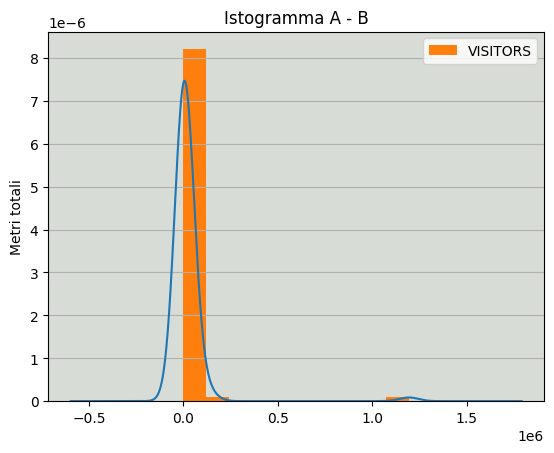

In [58]:
import matplotlib.pyplot as plt  
fig, ax = plt.subplots()
merged_final.plot.kde(ax=ax, legend=False, title='Istogramma A - B')
merged_final.plot.hist(density=True, ax=ax)
ax.set_ylabel('Metri totali')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

C:\Users\tommy\AppData\Local\Temp\ipykernel_8352\3605830064.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='VISITORS', ylabel='Density'>

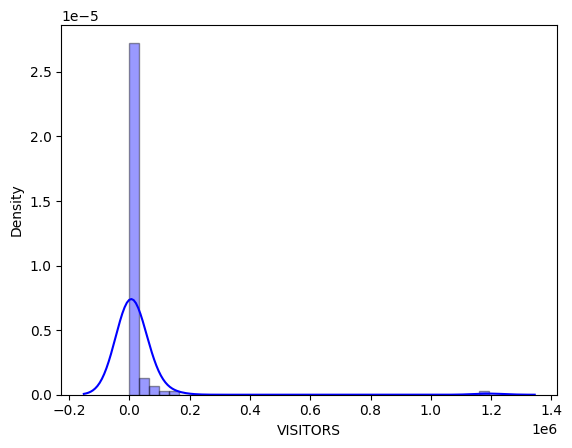

In [59]:
metraj=merged_final.sort_values("Total_Mete",ascending=True)
visavis=metraj.VISITORS[1:94]
comunes=metraj.Total_Mete[1:94]

sns.distplot(visavis, hist=True, kde=True, bins=int(180/5), color = 'blue',hist_kws={'edgecolor':'black'})

In [60]:
merged_final_result = pd.read_csv("result.csv",encoding='latin1')

merged_final_result

,PRO_COM,Destinazione,Total_Mete,COMUNE,VISITORS
0,1272,28001,381587,Torino,23420
1,6003,28001,323323,Alessandria,1896
2,2158,28001,314338,Vercelli,860
3,26086,28001,69240,Treviso,39864
4,97042,28001,266729,Lecco,1900
...,...,...,...,...,...
89,62008,28001,692191,Benevento,792
90,57059,28001,479605,Rieti,472
91,93033,28001,118634,Pordenone,9120
92,60038,28001,548972,Frosinone,848


In [61]:
merged_final_result = pd.read_csv("result.csv",encoding='latin1')

merged_final_result


,PRO_COM,Destinazione,Total_Mete,COMUNE,VISITORS
0,1272,28001,381587,Torino,23420
1,6003,28001,323323,Alessandria,1896
2,2158,28001,314338,Vercelli,860
3,26086,28001,69240,Treviso,39864
4,97042,28001,266729,Lecco,1900
...,...,...,...,...,...
89,62008,28001,692191,Benevento,792
90,57059,28001,479605,Rieti,472
91,93033,28001,118634,Pordenone,9120
92,60038,28001,548972,Frosinone,848


In [62]:
merged_final_result = merged_final_result.sort_values("Total_Mete").reset_index(drop=True)

In [63]:
merged_final_result

,PRO_COM,Destinazione,Total_Mete,COMUNE,VISITORS
0,28060,28001,11372,Padova,1193188
1,29041,28001,40147,Rovigo,57684
2,24116,28001,46475,Vicenza,84048
3,27042,28001,48800,Venezia,140600
4,38008,28001,68770,Ferrara,26888
...,...,...,...,...,...
89,76063,28001,823506,Potenza,1084
90,73027,28001,867165,Taranto,2256
91,74001,28001,886126,Brindisi,1220
92,75035,28001,923400,Lecce,1696


In [64]:
merged_final_result.Total_Mete = merged_final_result.Total_Mete/1000


C:\Users\tommy\AppData\Local\Temp\ipykernel_8352\1938291473.py:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




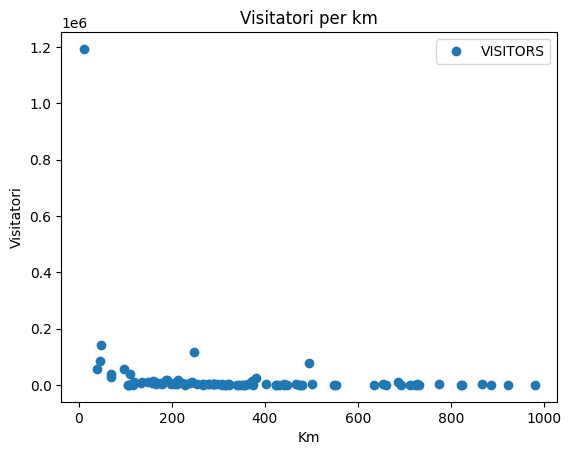

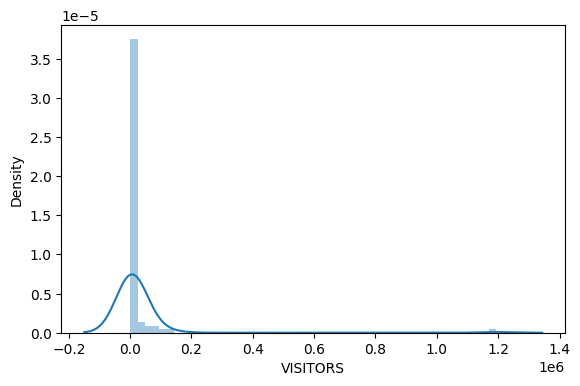

In [65]:
merged_final_result.shape
merged_final_result.describe()

merged_final_result.plot(x='Total_Mete', y='VISITORS', style='o')  
plt.title('Visitatori per km')  
plt.xlabel('Km')  
plt.ylabel('Visitatori')  

plt.figure(figsize=(6.5,4))
plt.tight_layout()
seabornInstance.distplot(merged_final_result['VISITORS'])
plt.show()

In [66]:
X = merged_final_result['Total_Mete'].values.reshape(-1,1)
y = merged_final_result['VISITORS'].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)


y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df



[77446.85545267]
[[-145.89985516]]


,Actual,Predicted
0,84048,70666.159684
1,1716,44117.054841
2,1188,25455.733867
3,8024,54311.661320
4,5756,57930.853127
5,23420,21773.367422
6,1904,18542.561030
7,1168,-18837.273662
8,10268,41747.349393
9,2024,-17889.508202


In [68]:
import plotly.graph_objects as go

In [69]:
from scipy import optimize, stats

In [70]:
x = X.ravel()

y= y.ravel()

In [71]:
x

array([ 11.372,  40.147,  46.475,  48.8  ,  68.77 ,  69.24 ,  97.848,
       105.915, 107.183, 107.539, 109.809, 116.437, 118.634, 133.763,
       136.009, 150.287, 158.569, 160.579, 164.018, 167.101, 178.235,
       179.61 , 188.635, 189.906, 199.149, 204.68 , 206.068, 212.498,
       213.236, 223.239, 228.443, 230.881, 239.792, 244.685, 248.812,
       254.381, 266.729, 267.682, 267.746, 277.97 , 280.716, 288.039,
       289.741, 290.117, 290.123, 297.018, 307.977, 308.617, 314.338,
       316.885, 320.601, 323.323, 324.117, 341.155, 345.594, 351.679,
       356.348, 357.7  , 363.46 , 372.636, 375.632, 381.587, 403.731,
       423.704, 424.308, 430.249, 441.579, 441.661, 446.9  , 467.368,
       474.437, 478.541, 479.605, 494.962, 500.88 , 548.972, 552.794,
       635.601, 653.437, 659.933, 686.656, 692.191, 712.41 , 722.541,
       727.566, 728.123, 731.319, 773.722, 822.242, 823.506, 867.165,
       886.126, 923.4  , 980.045])

In [72]:
y

array([1193188,   57684,   84048,  140600,   26888,   39864,   56584,
           368,     660,     320,   37912,    1764,    9120,    5756,
         10860,   10380,    8024,   15120,    9168,    2832,    7364,
          4720,   18592,   16588,    2872,    4932,    7868,    5112,
         17076,    6272,    1716,    2532,    5652,   10268,  115864,
          3184,    1900,    1272,    2552,    2768,    3004,    2816,
          3388,    3800,    2188,    3028,    1376,    3008,     860,
          1724,    3124,    1896,     848,    1472,     680,    1308,
          1188,    1148,    4428,   15712,    1208,   23420,    1904,
           928,     992,    1076,    1924,     924,    1204,    2660,
           444,    1060,     472,   77520,    2440,     848,    1744,
           796,    2024,    1168,   11488,     792,    1064,     744,
          1096,    2080,    1116,    4420,    1092,    1084,    2256,
          1220,    1696,    1056], dtype=int64)

In [73]:
# definire la funzione per il test F


#fig, ax = plt.subplots(figsize=(10, 6)) # creare la figura e gli assi
#ax.scatter(x=x, y=y, marker='o', c='darkblue', label="data")
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

def f1(x, a0, a1):
    return a0 /x**2

def f2(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2

def f3(x, a0, a1, a2, a3):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3

(fa0, fa1), cov = optimize.curve_fit(f1, x, y)
y1 = f1(x, fa0, fa1)
#ax.plot(x, y1, color='r', label="linear")

ssr_1 = np.sum((y1 - y)**2)
ndof_1 = 2 - 1 # n of parameters - 1

y2 = f1(np.linspace(0,1000,150),fa0,fa1)
#ax.plot(np.linspace(0,1000,150), y2, color='r', label="linear")


c:\Users\tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\tommy\AppData\Local\Temp\ipykernel_8352\969480348.py:13: RuntimeWarning:

divide by zero encountered in divide



In [74]:
#px.line(np.linspace(0,50,150), y2)

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.linspace(0,1000,150),  y=y2, mode='lines', name='Linea'))
fig.add_trace(go.Scatter(x=np.sort(np.ravel(X)), y=np.ravel(y), mode='markers', name='Punti'))

# Aggiunta dei punti al grafico


# Impostazione del layout del grafico
fig.update_layout(title='Regressione lineare',
                 xaxis_title='Distanza km',
                 yaxis_title='Flusso')
fig.update_layout(yaxis_range=[-100_000,1_300_000])
# Visualizzazione del grafico
fig.show()

## Progetto 

## A04 = 530 km , A13 = 116,5 km

In [75]:
A04_len = 530
A13_len = 116.5

In [76]:
df_progetto = pd.read_table("INCSTRAD_Microdati_2018.txt")

C:\Users\tommy\AppData\Local\Temp\ipykernel_8352\3344907722.py:1: DtypeWarning:

Columns (6,7,114,115) have mixed types. Specify dtype option on import or set low_memory=False.



In [77]:
pd.unique(df_progetto.denominazione_della_strada)

array(['147', '056', '001', '000', '115', '113', '075', '008', '448',
       '052', '014', '490', '126', '036', '016', '717', '005', '153',
       '082', '059', '088', '049', '051', '120', '421', '637', '081',
       '003', '012', '084', '667', '044', '601', '092', '516', '417',
       '050', '293', '061', '313', '022', '038', '060', '015', '091',
       '288', '240', '195', '071', '515', '048', '121', '110', '493',
       '004', '218', '189', '010', '031', '029', '017', '207', '034',
       '042', '094', '141', '026', '479', '232', '037', '130', '251',
       '002', '205', '685', '007', '072', '006', '624', '027', '079',
       '102', '023', '242', '203', '024', '389', '454', '020', '216',
       '101', '119', '213', '   ', '196', '204', '019', '080', '188',
       '453', '117', '035', '186', '155', '039', '263', '621', '077',
       '411', '013', '157', '030', '309', '650', '259', '009', '040',
       '074', '156', '524', '021', '499', '225', '011', '628', '600',
       '432', '285',

In [78]:
df_progetto = df_progetto[df_progetto.denominazione_della_strada.isin(["A13", "A04"])].reset_index(drop=True)

In [79]:
df_progetto

,anno,provincia,comune,giorno,organo_di_rilevazione,localizzazione_incidente,denominazione_della_strada,tronco_di_strada_o_autostrada,tipo_di_strada,pavimentazione,...,feriti_maschi_coinvolti_su97,feriti_femmine_coinvolti_s98,morti_entro_24_ore,morti_entro_30_giorni,feriti,descrizione_strada,Ora,chilometri,ettometrica,trimestre
0,18,17,40,5,1,7,A04,,3,1,...,0,0,0,0,1,...,3,0209,750,1
1,18,16,91,3,1,7,A04,,3,1,...,0,0,0,0,2,...,15,0166,650,1
2,18,108,12,4,1,7,A04,,3,1,...,0,0,0,0,1,...,12,0139,500,1
3,18,15,44,4,1,7,A04,,3,1,...,0,0,0,0,1,...,18,0151,424,1
4,18,15,77,5,1,7,A04,,3,1,...,0,0,0,0,1,...,22,0137,115,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,18,37,35,3,1,7,A13,,1,1,...,0,0,0,0,1,...,2,0023,000,2
1099,18,37,6,4,1,7,A13,,3,1,...,0,0,0,0,1,...,17,0021,610,2
1100,18,37,35,2,1,7,A13,,3,1,...,1,0,0,0,2,...,9,0022,300,4
1101,18,37,35,3,1,7,A13,,2,1,...,0,0,0,0,1,...,16,0020,500,4


In [80]:
df_raggruppato = df_progetto.denominazione_della_strada.value_counts().reset_index()

In [81]:
df_raggruppato

,denominazione_della_strada,count
0,A04,970
1,A13,133


## Numero incidenti

In [82]:
fig = px.pie(df_raggruppato, values="count", names="denominazione_della_strada")
fig.update_layout(title='Numero Incidenti')

## Numero Feriti

In [83]:
df_raggruppato2  = df_progetto.groupby(by="denominazione_della_strada").sum().loc[:, ["feriti", "morti_entro_24_ore", "morti_entro_30_giorni"]].reset_index()

In [84]:
fig = px.pie(df_raggruppato2, values="feriti", names="denominazione_della_strada")
fig.update_layout(title='Feriti per Autostrada')

## Numero morti entro 24 ore 

In [85]:
fig = px.pie(df_raggruppato2, values="morti_entro_24_ore", names="denominazione_della_strada")
fig.update_layout(title='Morti entro 24 ore per Autostrada')

## Numero morti entro 30 giorni 

In [86]:
fig = px.pie(df_raggruppato2, values="morti_entro_30_giorni", names="denominazione_della_strada")
fig.update_layout(title='Morti entro 30 giorni per Autostrada')

In [87]:
dizionario = {riga[1] : riga[2] for riga in df_province.values}
dizionario2 = {riga[1] : riga[2] for riga in df_comune.values}

In [88]:
df_progetto["PRO_COM"] = (df_progetto.provincia.astype(str)  +df_progetto.comune.astype(int).apply(lambda x: str(x) if(x>=100) else ( "0" + str(x) if(x>=10) else "00" +str(x)) )).astype(int)
df_progetto["COMUNE"] = df_progetto.PRO_COM.apply(lambda x: dizionario2[x])
df_progetto["PROVINCIA"] = df_progetto.provincia.apply(lambda x: dizionario[x])

In [89]:
df_raggruppato  = df_progetto["COMUNE"].value_counts().sort_values(ascending=False).reset_index()

## Numero incidenti per Comune

In [90]:
px.bar(df_raggruppato, x="COMUNE", y= "count") 

## Per A13

In [91]:
df_raggruppato  = df_progetto.loc[ df_progetto.denominazione_della_strada=="A13", "COMUNE"].value_counts().sort_values(ascending=False).reset_index()

In [92]:
px.bar(df_raggruppato, x="COMUNE", y= "count") 

## Per A04

In [93]:
df_raggruppato  = df_progetto.loc[ df_progetto.denominazione_della_strada=="A04", "COMUNE"].value_counts().sort_values(ascending=False).reset_index()

In [94]:
px.bar(df_raggruppato, x="COMUNE", y= "count") 

## Feriti - Morti per Comune

In [95]:
df_raggruppato  = df_progetto.groupby(by=["denominazione_della_strada", "COMUNE"]).sum().loc[:, ["feriti", "morti_entro_24_ore", "morti_entro_30_giorni"]].sort_values("feriti", ascending=False).reset_index()

In [96]:
df_raggruppato

,denominazione_della_strada,COMUNE,feriti,morti_entro_24_ore,morti_entro_30_giorni
0,A04,Milano,70,0,0
1,A04,Cinisello Balsamo,65,1,0
2,A04,Cormano,54,0,0
3,A13,Ferrara,51,3,1
4,A04,Lonato del Garda,51,0,0
...,...,...,...,...,...
170,A04,Saluggia,1,0,0
171,A04,Fossalta di Piave,1,0,0
172,A04,Bresso,1,0,0
173,A04,Rubano,1,0,0


In [97]:
px.bar(df_raggruppato, x="COMUNE", y= ["feriti","morti_entro_24_ore", "morti_entro_30_giorni"]) 

## Feriti - Morti per Provincia

In [98]:
df_raggruppato  = df_progetto.groupby(by=["denominazione_della_strada", "PROVINCIA"]).sum().loc[:, ["feriti", "morti_entro_24_ore", "morti_entro_30_giorni"]].sort_values("feriti", ascending=False).reset_index()

In [99]:
df_raggruppato

,denominazione_della_strada,PROVINCIA,feriti,morti_entro_24_ore,morti_entro_30_giorni
0,A04,Milano,319,7,1
1,A04,Brescia,276,4,0
2,A04,Venezia,131,5,0
3,A04,Vicenza,130,3,0
4,A04,Verona,127,0,2
5,A04,Bergamo,118,0,0
6,A04,Torino,93,0,0
7,A04,Monza e della Brianza,87,2,0
8,A13,Bologna,84,1,0
9,A04,Padova,80,2,0


## Per A13

In [100]:
fig = px.bar(df_raggruppato.loc[df_raggruppato.denominazione_della_strada=="A13"], x="PROVINCIA", y= ["feriti","morti_entro_24_ore", "morti_entro_30_giorni"]) 
fig.update_layout(title='Feriti-Morti per Provincia in A13')

## Per A04

In [101]:
fig = px.bar(df_raggruppato.loc[df_raggruppato.denominazione_della_strada=="A04"], x="PROVINCIA", y= ["feriti","morti_entro_24_ore", "morti_entro_30_giorni"]) 
fig.update_layout(title='Feriti-Morti per Provincia in A04')

In [102]:
df_raggruppato2

,denominazione_della_strada,feriti,morti_entro_24_ore,morti_entro_30_giorni
0,A04,1626,33,4
1,A13,236,7,1


In [103]:
df_raggruppato2

,denominazione_della_strada,feriti,morti_entro_24_ore,morti_entro_30_giorni
0,A04,1626,33,4
1,A13,236,7,1


In [104]:
dizionario4 = {1:"Lunedi", 2:"Materdi", 3:"Mercoledi", 4:"Giovedi", 5:"Venerdi", 6:"Sabato", 7:"Domenica"}

In [105]:
df_progetto["giorno_num"] = df_progetto.giorno

In [106]:
df_progetto.giorno = df_progetto.giorno.apply(lambda x: dizionario4[x])

## Numero incidenti per giorno

In [107]:
df_raggruppato2  = df_progetto.giorno.value_counts().reset_index()

In [108]:
fig = px.pie(df_raggruppato2, values="count", names="giorno")
fig.update_layout(title='Incidentalità giorni')

## Numero incidenti per condizione metereologica

In [109]:
dizionario5 ={1:"Sereno", 2:"Nebbia", 3:"Pioggia", 4:"Grandine", 5 :"Neve", 6: "Vento forte", 7 : "Altro"}

In [110]:
df_progetto.condizioni_meteorologiche = df_progetto.condizioni_meteorologiche.apply(lambda x: dizionario5[x])

In [111]:
df_raggruppato2  = df_progetto.condizioni_meteorologiche.value_counts().reset_index()

In [112]:
df_raggruppato2

,condizioni_meteorologiche,count
0,Sereno,828
1,Altro,151
2,Pioggia,94
3,Nebbia,26
4,Neve,3
5,Vento forte,1


In [113]:
fig = px.pie(df_raggruppato2, values="count", names="condizioni_meteorologiche")
fig.update_layout(title='Numero incidenti per condizione metereologica')

In [114]:
df_raggruppato2  = df_progetto.loc[df_progetto.denominazione_della_strada == "A04", :].condizioni_meteorologiche.value_counts().reset_index()

## In A04

In [115]:
fig = px.pie(df_raggruppato2, values="count", names="condizioni_meteorologiche")
fig.update_layout(title='Numero incidenti Autostrada A04 per condizione metereologica')

## In A13

In [116]:
df_raggruppato2  = df_progetto.loc[df_progetto.denominazione_della_strada == "A13", :].condizioni_meteorologiche.value_counts().reset_index()

In [117]:
fig = px.pie(df_raggruppato2, values="count", names="condizioni_meteorologiche")
fig.update_layout(title='Numero Incidenti Autostrada A13 per condizione metereologica')

In [118]:
df_raggruppato3  = df_progetto.groupby(by=["denominazione_della_strada", "condizioni_meteorologiche"]).sum().loc[:, ["feriti", "morti_entro_24_ore", "morti_entro_30_giorni"]].reset_index()

In [119]:
df_raggruppato3

,denominazione_della_strada,condizioni_meteorologiche,feriti,morti_entro_24_ore,morti_entro_30_giorni
0,A04,Altro,215,7,3
1,A04,Nebbia,34,1,0
2,A04,Neve,3,0,0
3,A04,Pioggia,146,0,0
4,A04,Sereno,1227,25,1
5,A04,Vento forte,1,0,0
6,A13,Altro,26,1,1
7,A13,Nebbia,20,2,0
8,A13,Pioggia,10,0,0
9,A13,Sereno,180,4,0


## Numero feriti per condizione metereologica

In [120]:
fig = px.pie(df_raggruppato3, values="feriti", names="condizioni_meteorologiche")
fig.update_layout(title='Feriti per condizione metereologica')

## In A04

In [121]:
fig = px.pie(df_raggruppato3.loc[df_raggruppato3.denominazione_della_strada == "A04", :], values="feriti", names="condizioni_meteorologiche")
fig.update_layout(title='Feriti Autostrada A4 per condizione metereologica')

## In A13

In [122]:
fig = px.pie(df_raggruppato3.loc[df_raggruppato3.denominazione_della_strada == "A13", :], values="feriti", names="condizioni_meteorologiche")
fig.update_layout(title='Feriti Autostrada A13 per condizione metereologica')

In [123]:
dizionario3 = {1: 	"Scontro frontale", 	 	
2: "Scontro frontale-laterale" , 	
3	: "Scontro laterale"	 	,
4	: "Tamponamento"	 	,
5	: "Investimento di pedoni"	, 	
6	: "Urto con veicolo in fermata o in arresto"	, 	
7	: "Urto con veicolo in sosta"	 	,
8	: "Urto con ostacolo"	 	,
9: 	"Urto con treno"	 	,
10	: "Fuoriuscita, sbandamento"	, 	
11	: "Infortunio per frenata improvvisa"	, 	
12: "Infortunio per caduta da veicolo"}

In [124]:
df_progetto.natura_incidente = df_progetto.natura_incidente.apply(lambda x : dizionario3[x])

In [125]:
df_progetto.natura_incidente.value_counts().reset_index()

,natura_incidente,count
0,Tamponamento,670
1,Scontro laterale,116
2,"Fuoriuscita, sbandamento",114
3,Urto con ostacolo,88
4,Scontro frontale-laterale,55
5,Urto con veicolo in fermata o in arresto,31
6,Scontro frontale,20
7,Infortunio per caduta da veicolo,5
8,Investimento di pedoni,2
9,Urto con veicolo in sosta,1


## Natura dell'incidente

In [126]:
fig = px.pie(df_progetto.natura_incidente.value_counts().reset_index(), values="count", names="natura_incidente")
fig.update_layout(title='Natura Incidente')

## In A13

In [127]:
fig = px.pie(df_progetto.loc[df_progetto.denominazione_della_strada == "A13", "natura_incidente"].value_counts().reset_index(), values="count", names="natura_incidente")
fig.update_layout(title='Autostrada A13 Natura Incidente')

## In A04

In [128]:
fig = px.pie(df_progetto.loc[df_progetto.denominazione_della_strada == "A04", "natura_incidente"].value_counts().reset_index(), values="count", names="natura_incidente")
fig.update_layout(title='Autostrada A04 Natura Incidente')

## Conformazione della strada

In [129]:
dizionario6 = {1	:"Incrocio", 	
2	:"Rotatoria"	 	,
3	:"Intersezione segnalata",	 	
4	:"Intersezione con semaforo o vigile",	 	
5	:"Intersezione non segnalata"	, 	
6	:"Passaggio a livello"	, 	
7	:"Rettilineo",	 	
8	:"Curva"	 	,
9	:"Dosso, strettoia"	 ,	
10	:"Pendenza"	 	,
11	:"Galleria illuminata"	, 	
12	:"Galleria non illuminata"}

In [130]:
df_progetto.intersezione_o_non_interse3 = df_progetto.intersezione_o_non_interse3.apply(lambda x: dizionario6[x])

In [131]:
fig = px.pie(df_progetto.intersezione_o_non_interse3.value_counts().reset_index(), values="count", names="intersezione_o_non_interse3")
fig.update_layout(title='Conformazione strada')

In [132]:
fig = px.pie(df_progetto.loc[df_progetto.denominazione_della_strada == "A13"].intersezione_o_non_interse3.value_counts().reset_index(), values="count", names="intersezione_o_non_interse3")
fig.update_layout(title='Conformazione strada in A13')

In [133]:
fig = px.pie(df_progetto.loc[df_progetto.denominazione_della_strada == "A04"].intersezione_o_non_interse3.value_counts().reset_index(), values="count", names="intersezione_o_non_interse3")
fig.update_layout(title='Conformazione strada in A04')

## Segnaletica

In [134]:
dizionario7 = {1	: "Assente",	 	
2	:"Verticale",	 	
3	:"Orizzontale",	 	
4	:"Verticale e orizzontale",	 	
5	:"Temporanea di cantiere"}

In [135]:
df_progetto.segnaletica = df_progetto.segnaletica.apply(lambda x: dizionario7[x])

In [136]:
fig = px.pie(df_progetto.segnaletica.value_counts().reset_index(), values="count", names="segnaletica")
fig.update_layout(title='Segnaletica')

In [137]:
fig = px.pie(df_progetto.loc[df_progetto.denominazione_della_strada == "A04"].segnaletica.value_counts().reset_index(), values="count", names="segnaletica")
fig.update_layout(title='Segnaletica in A04')

In [138]:
fig = px.pie(df_progetto.loc[df_progetto.denominazione_della_strada == "A13"].segnaletica.value_counts().reset_index(), values="count", names="segnaletica")
fig.update_layout(title='Segnaletica in A13')

## Veicoli tipologia

In [139]:
df_progetto.segnaletica

0       Verticale e orizzontale
1       Verticale e orizzontale
2       Verticale e orizzontale
3                   Orizzontale
4       Verticale e orizzontale
                 ...           
1098    Verticale e orizzontale
1099                Orizzontale
1100                Orizzontale
1101    Verticale e orizzontale
1102    Verticale e orizzontale
Name: segnaletica, Length: 1103, dtype: object

In [140]:
df_progetto.tipo_veicolo_a

0        1
1        1
2        8
3        8
4        1
        ..
1098     1
1099     1
1100    12
1101     1
1102    12
Name: tipo_veicolo_a, Length: 1103, dtype: int64

In [141]:
dizionario7 = {1	:"Autovettura privata",	 	
2	:"Autovettura privata con rimorchio",		 	
3	:"Autovettura pubblica",		 	
4	:"Autovettura di soccorso o di polizia",		 	
5	:"Autobus o filobus in servizio urbano",		 	
6	:"Autobus di linea o non di linea in extraurbana",		 	
7	:"Tram",		 	
8	:"Autocarro",		 	
9	:"Autotreno con rimorchio",		 	
10	:"Autosnodato o autoarticolato",		 	
11	:"Veicoli speciali",		 	
12	:"Trattore stradale o motrice",		 	
13	:"Trattore agricolo",		 	
14	:"Velocipede",		 	
15	:"Ciclomotore",		 	
16	:"Motociclo a solo",		 	
17	:"Motociclo con passeggero",		 	
18	:"Motocarro o motofurgone",		 	
19	:"Veicolo a trazione animale o a braccia",		 	
20	:"Veicolo ignoto perch� datosi alla fuga",		 		
21	:"Quadriciclo"}

In [142]:
dizionario8 = {"01"	:"Autovettura privata",	 	
"02"	:"Autovettura privata con rimorchio",		 	
"03"	:"Autovettura pubblica",		 	
"04"	:"Autovettura di soccorso o di polizia",		 	
"05"	:"Autobus o filobus in servizio urbano",		 	
"06"	:"Autobus di linea o non di linea in extraurbana",		 	
"07"	:"Tram",		 	
"08"	:"Autocarro",		 	
"09"	:"Autotreno con rimorchio",		 	
"10"	:"Autosnodato o autoarticolato",		 	
"11"	:"Veicoli speciali",		 	
"12"	:"Trattore stradale o motrice",		 	
"13"	:"Trattore agricolo",		 	
"14"	:"Velocipede",		 	
"15":"Ciclomotore",		 	
"16"	:"Motociclo a solo",		 	
"17"	:"Motociclo con passeggero",		 	
"18":"Motocarro o motofurgone",		 	
"19"	:"Veicolo a trazione animale o a braccia",		 	
"20"	:"Veicolo ignoto perch� datosi alla fuga",		 		
"21"	:"Quadriciclo",
"": "null"}

In [143]:
df_progetto.tipo_veicolo_a  = df_progetto.tipo_veicolo_a.apply(lambda x: dizionario7[x])
df_progetto.tipo_veicoli__b_ = df_progetto.tipo_veicoli__b_.apply(lambda x: dizionario8[x.strip()])
df_progetto.tipo_veicolo__c_ = df_progetto.tipo_veicolo__c_.apply(lambda x: dizionario8[x.strip()])

In [144]:
dizionario9 = {}
for lista in [list(df_progetto.tipo_veicolo_a), list(df_progetto.tipo_veicoli__b_),list(df_progetto.tipo_veicolo__c_)]:
    for riga in lista:
        if(riga != "null" and riga in dizionario9):
            dizionario9[riga]  += 1
        else:
            if(riga != "null"):
                dizionario9[riga]  = 1


In [145]:
fig = px.pie(pd.DataFrame({"Tipologia" : dizionario9.keys() ,"Numero" : dizionario9.values() }), values="Numero", names="Tipologia")
fig.update_layout(title='Incidenti veicoli')

In [146]:
df_mortalità = df_progetto.loc[df_progetto.morti_entro_24_ore>0]

In [147]:
a = df_mortalità.loc[(df_mortalità.veicolo__a___esito_conducente=="3") |  (df_mortalità.veicolo__a___esito_passegg38 =="3") | (df_mortalità.veicolo__a___esito_passegg41 =="3")  | (df_mortalità.veicolo__a___esito_passegg41 =="3")].tipo_veicolo_a.value_counts()

In [148]:
b = df_mortalità.loc[(df_mortalità.veicolo__b___esito_conducente=="3") | (df_mortalità.veicolo__b___esito_passegg60 =="3") | (df_mortalità.veicolo__b___esito_passegg63 =="3") 
                 | (df_mortalità.veicolo__b___esito_passegg66 =="3") ].tipo_veicoli__b_.value_counts()

In [149]:
c = df_mortalità.loc[(df_mortalità.veicolo__c___esito_conducente=="3")| (df_mortalità.veicolo__c___esito_passegg82 =="3") | (df_mortalità.veicolo__c___esito_passegg85 =="3") 
                 | (df_mortalità.veicolo__c___esito_passegg88 =="3")].tipo_veicolo__c_.value_counts()

In [150]:
a.reset_index()

,tipo_veicolo_a,count
0,Autovettura privata,3
1,Autocarro,3
2,Trattore stradale o motrice,3
3,Autosnodato o autoarticolato,1
4,Motociclo a solo,1


In [151]:
b.reset_index()

,tipo_veicoli__b_,count
0,Autovettura privata,6
1,Autocarro,4
2,Trattore stradale o motrice,2
3,Veicoli speciali,1


In [152]:
c.reset_index()

,tipo_veicolo__c_,count
0,Autovettura privata,1
1,Autocarro,1


In [153]:
dizionario9 = {}
for dataframe in [a.reset_index(), b.reset_index(),c.reset_index()]:
    for riga in dataframe.values:
        if(riga[0] in dizionario9):
            dizionario9[riga[0]]  += riga[1]
        else:
            dizionario9[riga[0]]  = riga[1]


In [154]:
pd.DataFrame({"Tipologia" : dizionario9.keys() ,"Numero" : dizionario9.values() })

,Tipologia,Numero
0,Autovettura privata,10
1,Autocarro,8
2,Trattore stradale o motrice,5
3,Autosnodato o autoarticolato,1
4,Motociclo a solo,1
5,Veicoli speciali,1


## Veicoli in incidenti mortali

In [155]:
fig = px.pie(pd.DataFrame({"Tipologia" : dizionario9.keys() ,"Numero" : dizionario9.values() }), values="Numero", names="Tipologia")
fig.update_layout(title='Incidenti mortali veicoli')

## Analisi Età conducente

In [156]:
a = df_progetto.veicolo__a___et__conducente.value_counts().to_dict()

In [157]:
a

{'30-44': 382,
 '18-29': 242,
 '45-54': 238,
 '55-64': 153,
 '65+  ': 77,
 'n.i. ': 11}

In [158]:
b =df_progetto.veicolo__b___et__conducente.value_counts().to_dict()

In [159]:
b

{'30-44': 294,
 '45-54': 218,
 '     ': 211,
 '55-64': 151,
 '18-29': 143,
 '65+  ': 53,
 'n.i. ': 33}

In [160]:
c = df_progetto.veicolo__c___et__conducente.value_counts().to_dict()

In [161]:
c

{'     ': 798,
 '30-44': 108,
 '45-54': 93,
 '55-64': 45,
 '18-29': 41,
 '65+  ': 13,
 'n.i. ': 5}

In [162]:
totale = {"65+": a["65+  "]+b["65+  "]+c["65+  "],"55-64": a["55-64"]+b["55-64"]+c["55-64"] ,"45-54": a["45-54"]+b["45-54"]+c["45-54"] ,"30-44": a["30-44"]+b["30-44"]+c["30-44"], '18-29': a['18-29']+b['18-29']+c['18-29']}

In [163]:
totale

{'65+': 143, '55-64': 349, '45-54': 549, '30-44': 784, '18-29': 426}

In [164]:
eta = pd.DataFrame({"eta": totale.keys() , "count": totale.values()})

In [165]:
eta

,eta,count
0,65+,143
1,55-64,349
2,45-54,549
3,30-44,784
4,18-29,426


In [166]:
fig = px.pie(eta, values="count", names="eta")
fig.update_layout(title='Età del conducente')

## Ora dell'incidente

In [167]:
df_raggruppato6 = df_progetto.Ora.value_counts().sort_values(ascending=False).reset_index()

In [168]:
df_raggruppato6

,Ora,count
0,9,92
1,18,83
2,16,70
3,11,70
4,17,67
5,19,66
6,10,65
7,15,61
8,12,60
9,14,52


In [169]:
fig = px.pie(df_raggruppato6, values="count", names="Ora")
fig.update_layout(title='Ora dell\'incidente')

In [170]:
df_raggruppato6 = df_progetto.loc[:, ["Ora", "giorno"]].value_counts().reset_index()

In [171]:
df_raggruppato6

,Ora,giorno,count
0,18,Venerdi,21
1,9,Mercoledi,19
2,19,Venerdi,18
3,9,Materdi,16
4,15,Mercoledi,16
...,...,...,...
161,5,Venerdi,1
162,5,Mercoledi,1
163,5,Materdi,1
164,4,Lunedi,1


In [172]:
fig = px.sunburst(df_raggruppato6, path=['giorno', 'Ora'], values='count')

# Show the chart
fig.update_layout(title='Ora dell\'incidente')

## Numero incidenti per km 

In [173]:
df_progetto.chilometri = df_progetto.chilometri.apply(lambda x: int(x))

In [174]:
df_raggruppamento7 = df_progetto.loc[df_progetto.denominazione_della_strada == "A04"].chilometri.value_counts().reset_index().sort_values("chilometri")

In [175]:
fig = px.line(df_raggruppamento7, x="chilometri", y="count")
fig.update_layout(title='Numero incidenti A04')

In [176]:
fig = px.bar(df_raggruppamento7, x="chilometri", y="count")
fig.update_layout(title='Numero incidenti A04')

In [177]:
df_raggruppamento7 = df_progetto.loc[df_progetto.denominazione_della_strada == "A13"].chilometri.value_counts().reset_index().sort_values("chilometri")

In [178]:
fig = px.line(df_raggruppamento7, x="chilometri", y="count")
fig.update_layout(title='Numero incidenti A13')

In [179]:
fig = px.bar(df_raggruppamento7, x="chilometri", y="count")
fig.update_layout(title='Numero incidenti A13')

## Numero feriti per km 

In [180]:
df_raggruppamento7  = df_progetto.groupby(by=["denominazione_della_strada", "chilometri"]).sum().loc[:, ["feriti"]].reset_index()

In [181]:
df_raggruppamento7

,denominazione_della_strada,chilometri,feriti
0,A04,0,2
1,A04,1,2
2,A04,2,14
3,A04,3,8
4,A04,4,5
...,...,...,...
463,A13,105,2
464,A13,109,3
465,A13,113,1
466,A13,115,4


In [182]:
fig = px.line(df_raggruppamento7.loc[df_raggruppamento7.denominazione_della_strada=="A04"], x="chilometri", y="feriti")
fig.update_layout(title='Numero Feriti A04')

In [183]:
fig = px.bar(df_raggruppamento7.loc[df_raggruppamento7.denominazione_della_strada=="A04"], x="chilometri", y="feriti")
fig.update_layout(title='Numero feriti A04')

In [184]:
fig = px.line(df_raggruppamento7.loc[df_raggruppamento7.denominazione_della_strada=="A13"], x="chilometri", y="feriti")
fig.update_layout(title='Numero feriti A13')

In [185]:
fig =px.bar(df_raggruppamento7.loc[df_raggruppamento7.denominazione_della_strada=="A13"], x="chilometri", y="feriti")
fig.update_layout(title='Numero feriti A13')

## Poisson 

In [186]:
from scipy.stats import poisson

In [187]:
df_raggruppamento7 = df_progetto.loc[df_progetto.denominazione_della_strada == "A04"].chilometri.value_counts().reset_index().sort_values("chilometri")
p=df_raggruppamento7["count"].mean()/A04_len
mu = df_raggruppamento7["count"].mean()

In [188]:
fig = px.bar(x = [i for i in range(10)], y= poisson.pmf([i for i in range(10)], mu), labels={'x': 'Numero Incidenti', 'y':'Probabilità'})
fig.update_layout(title='Probabilità incidenti in A04')

In [189]:
df_raggruppamento7 = df_progetto.loc[df_progetto.denominazione_della_strada == "A13"].chilometri.value_counts().reset_index().sort_values("chilometri")
p=df_raggruppamento7["count"].mean()/int(A13_len)
mu = df_raggruppamento7["count"].mean()

In [190]:
fig = px.bar(x = [i for i in range(10)], y= poisson.pmf([i for i in range(10)], mu) ,labels={'x': 'Numero Incidenti', 'y':'Probabilità'})
fig.update_layout(title='Probabilità incidenti in A13')

In [191]:
df_users2_raggruppato = df_users2.groupby("COMUNE").FLOW.sum().reset_index()
df_raggruppato8 = df_progetto.loc[df_progetto.denominazione_della_strada == "A13"].chilometri.value_counts().reset_index().sort_values("chilometri").merge(df_progetto.loc[df_progetto.denominazione_della_strada == "A13"].groupby(by= ["COMUNE", "chilometri"]).provincia.count().reset_index().loc[ : , [ "COMUNE","chilometri"]].sort_values("chilometri"), how="inner", on="chilometri")
df_raggruppato8 = df_raggruppato8.merge(df_users2_raggruppato, how="inner", on="COMUNE").sort_values("chilometri")

In [192]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Line(x= df_raggruppato8["chilometri"],y=  df_raggruppato8["count"]),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x= df_raggruppato8["chilometri"], y= df_raggruppato8["FLOW"]),
    row=1, col=2
)

fig.update_layout(height=400, width=1200, title_text="Numero incidenti - Flusso dati per chilometro in A13")
fig.show()

c:\Users\tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [193]:
df_users2_raggruppato = df_users2.groupby("COMUNE").FLOW.sum().reset_index()
df_raggruppato8 = df_progetto.loc[df_progetto.denominazione_della_strada == "A04"].chilometri.value_counts().reset_index().sort_values("chilometri").merge(df_progetto.loc[df_progetto.denominazione_della_strada == "A04"].groupby(by= ["COMUNE", "chilometri"]).provincia.count().reset_index().loc[ : , [ "COMUNE","chilometri"]].sort_values("chilometri"), how="inner", on="chilometri")
df_raggruppato8 = df_raggruppato8.merge(df_users2_raggruppato, how="inner", on="COMUNE").sort_values("chilometri")

In [194]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Line(x= df_raggruppato8["chilometri"],y=  df_raggruppato8["count"]),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x= df_raggruppato8["chilometri"], y= df_raggruppato8["FLOW"]),
    row=1, col=2
)

fig.update_layout(height=400, width=1200, title_text="Numero incidenti - Flusso dati per chilometro in A04")
fig.show()

c:\Users\tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## Mappa

In [195]:
import geopandas, folium, matplotlib, mapclassify

In [196]:
df2 = geopandas.read_file("places.shp")  

In [197]:
df2 = df2.loc[df2["type"].isin(["village", "town", "locality","city"])]

In [198]:
df2["type"].value_counts()

type
village     8409
town        1079
locality     725
city         114
Name: count, dtype: int64

In [199]:
df2["COMUNE"]= df2.name

In [200]:
df_raggruppato8

,chilometri,count,COMUNE,FLOW
0,0,2,Torino,6720
1,0,2,Milano,69393
10,70,1,Recetto,32
11,82,1,Novara,108
12,83,1,Novara,108
...,...,...,...,...
179,451,2,Portogruaro,490
180,453,2,Portogruaro,490
181,454,2,Portogruaro,490
182,461,2,San Michele al Tagliamento,32


In [201]:
df_users2_raggruppato = df_users2.groupby("COMUNE").FLOW.sum().reset_index()
df_raggruppato8 = df_progetto.chilometri.value_counts().reset_index().sort_values("chilometri").merge(df_progetto.groupby(by= ["COMUNE", "chilometri"]).provincia.count().reset_index().loc[ : , [ "COMUNE","chilometri"]].sort_values("chilometri"), how="inner", on="chilometri")
df_raggruppato8 = df_raggruppato8.merge(df_users2_raggruppato, how="inner", on="COMUNE").sort_values("chilometri")


In [202]:
df_progetto_incidenti = df_raggruppato8.merge(df2.loc[: , ["COMUNE", "geometry"]], how="inner", on="COMUNE")

In [203]:
df_raggruppato8

,chilometri,count,COMUNE,FLOW
0,0,8,Bologna,16126
4,0,8,Milano,69393
13,0,8,Torino,6720
1,1,3,Bologna,16126
2,2,9,Bologna,16126
...,...,...,...,...
220,451,2,Portogruaro,490
221,453,2,Portogruaro,490
222,454,2,Portogruaro,490
223,461,2,San Michele al Tagliamento,32


In [204]:
df_progetto_incidenti

,chilometri,count,COMUNE,FLOW,geometry
0,0,8,Bologna,16126,POINT (11.34279 44.49388)
1,1,3,Bologna,16126,POINT (11.34279 44.49388)
2,2,9,Bologna,16126,POINT (11.34279 44.49388)
3,21,2,Bologna,16126,POINT (11.34279 44.49388)
4,0,8,Milano,69393,POINT (9.19062 45.46662)
...,...,...,...,...,...
220,451,2,Portogruaro,490,POINT (12.83662 45.77931)
221,453,2,Portogruaro,490,POINT (12.83662 45.77931)
222,454,2,Portogruaro,490,POINT (12.83662 45.77931)
223,461,2,San Michele al Tagliamento,32,POINT (12.99323 45.76761)


In [205]:
df_progetto_incidenti["INCIDENTI"] = df_progetto_incidenti["count"]

In [206]:
df_progetto_gdf = geopandas.GeoDataFrame(df_progetto_incidenti)

In [207]:
m = df_progetto_gdf.explore("INCIDENTI", name="Incidenti",marker_kwds = {"radius": 5})

In [208]:
df = geopandas.read_file("roads.shp")  


In [209]:
df = df.loc[df["type"]=="motorway"]


In [210]:
df.ref = df.ref.fillna("nessuno")

In [211]:
indice = df.loc[df["ref"].isin(["A14", "A10", "A20","A1","A3", "A29", "A24", "A12", "18", "A22", "A57", "A 1", "GRA", "A7", "A25", "A16", "A23", "A26", "RA15" ,"A5", "A19", "A56", "A52", "RA06", "A27",
                                "A30", "A14dir", "RA04", "A18", "A50", "A55", "A51", "A15", "A31", "A91", "A11", "A1dir", "RA11", "A21", "A18dir", "A29dir", "A8", "A28", "Autostrada Porto", "E-45", "A32"
                                , "SS 11", "Casello Spotorno", "SS106", "A54", "E841", "A6", "A 2", "A18 dir", "A 7", "A2", "A 3", "nessuno", "A4/A26", "A4/A5"])].index

In [212]:
df = df.drop(index=indice)

In [213]:
m = df.explore(m=m, name ="Autostrade")

In [214]:
m1 = df_progetto_gdf.explore(m = m, column = "FLOW", name="Flusso",marker_kwds = {"radius": 5})

In [215]:
folium.LayerControl().add_to(m1)

In [216]:
m